In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

dir_data = './data/'

In [3]:
f_app_train =os.path.join(dir_data,'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [6]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in app_train:
    if app_train[col].dtype == 'object':
        if len(list(app_train[col].unique())) == 2:
            app_train[col] = le.fit_transform(app_train[col])
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train['DAYS_EMPLOYED'] == 365243
app_train['DAYS_EMPLOYED'].replace({365243:np.nan},inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值
app_train['DAYS_BIRTH']=abs(app_train['DAYS_BIRTH'])

# 練習時間

參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [8]:
plt.style.use('seaborn')

In [52]:
app_mix = app_train.loc[:,['TARGET','AMT_INCOME_TOTAL','AMT_CREDIT','DAYS_BIRTH']]
ready_to_bin = ['AMT_INCOME_TOTAL','AMT_CREDIT','DAYS_BIRTH']

for i in ready_to_bin:
    app_mix[i+'_binned'] = pd.qcut(app_mix[i],10)
    print(app_mix[i+'_binned'].value_counts())
    print(app_mix.groupby([i+'_binned'])['TARGET'].mean())

(112500.0, 135000.0]       48849
(180000.0, 225000.0]       44809
(99000.0, 112500.0]        36907
(25649.999, 81000.0]       33391
(147150.0, 162000.0]       31120
(162000.0, 180000.0]       30704
(81000.0, 99000.0]         30280
(270000.0, 117000000.0]    27161
(225000.0, 270000.0]       19957
(135000.0, 147150.0]        4333
Name: AMT_INCOME_TOTAL_binned, dtype: int64
AMT_INCOME_TOTAL_binned
(25649.999, 81000.0]       0.081908
(81000.0, 99000.0]         0.082232
(99000.0, 112500.0]        0.087192
(112500.0, 135000.0]       0.084894
(135000.0, 147150.0]       0.090007
(147150.0, 162000.0]       0.086407
(162000.0, 180000.0]       0.084224
(180000.0, 225000.0]       0.078065
(225000.0, 270000.0]       0.070401
(270000.0, 117000000.0]    0.061375
Name: TARGET, dtype: float64
(604152.0, 755190.0]      34066
(44999.999, 180000.0]     33204
(180000.0, 254700.0]      31721
(432000.0, 513531.0]      30826
(513531.0, 604152.0]      30726
(306306.0, 432000.0]      30707
(1133748.0, 4050000.0

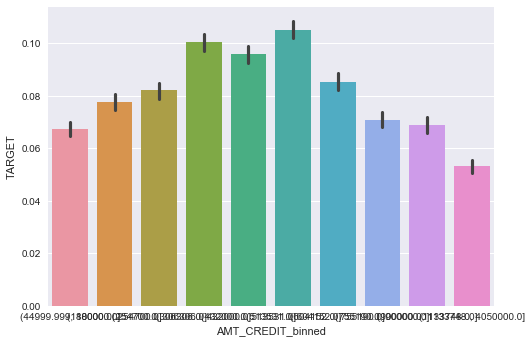

In [37]:
ax = sns.barplot(app_mix['AMT_CREDIT_binned'],app_mix['TARGET'])

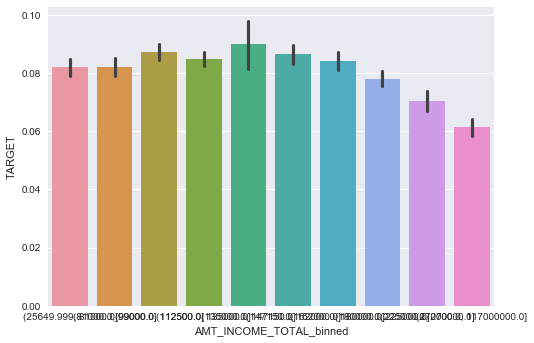

In [38]:
ax = sns.barplot(app_mix['AMT_INCOME_TOTAL_binned'],app_mix['TARGET'])

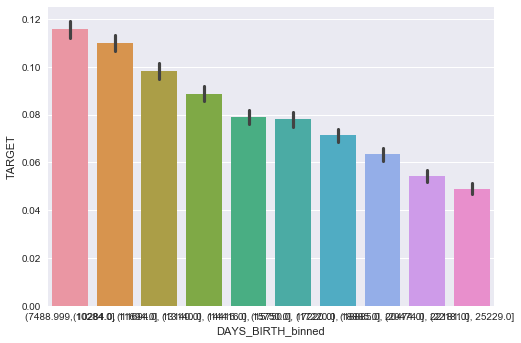

In [39]:
ax = sns.barplot(app_mix['DAYS_BIRTH_binned'],app_mix['TARGET'])